## Iris Flower classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('IRIS.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
 df.shape

(150, 5)

In [7]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

**Cheking if there any null values**

In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

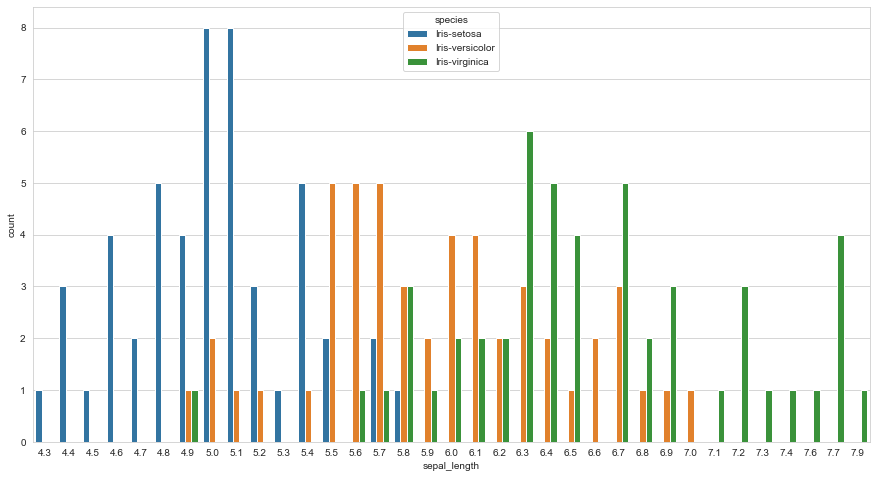

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(x='sepal_length',data=df,hue='species')
plt.show()

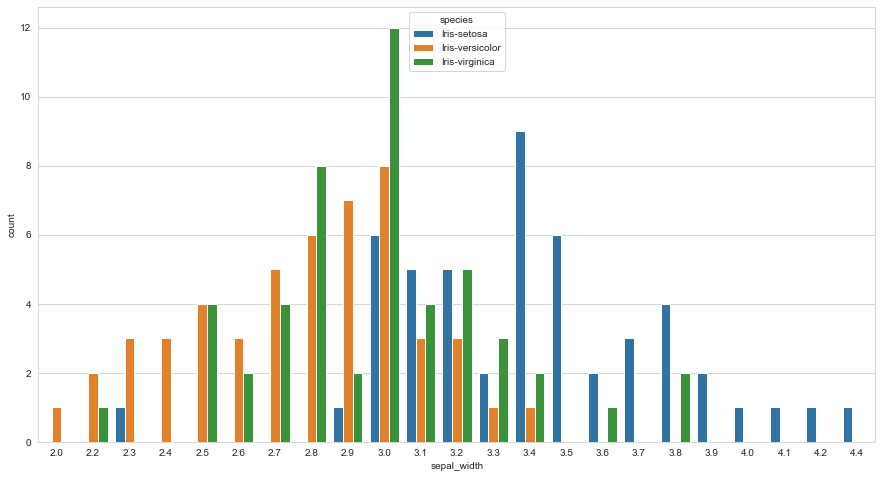

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(x='sepal_width',data=df,hue='species')
plt.show()

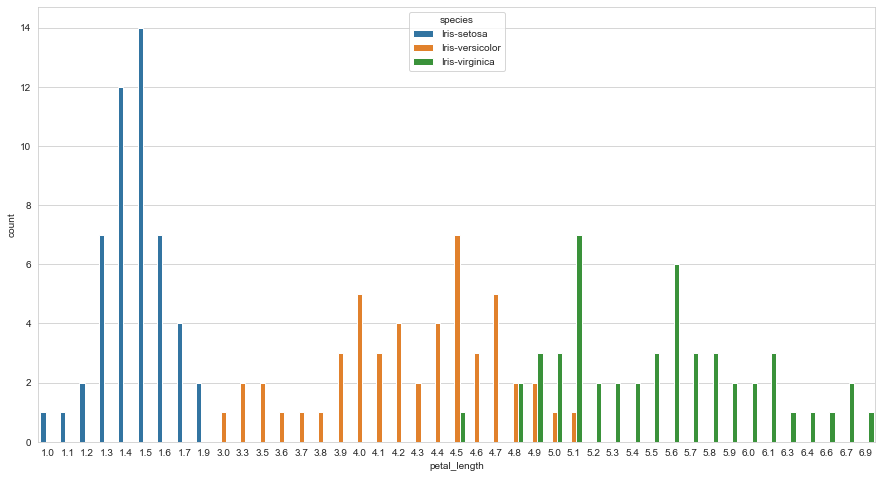

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(x='petal_length',data=df,hue='species')
plt.show()

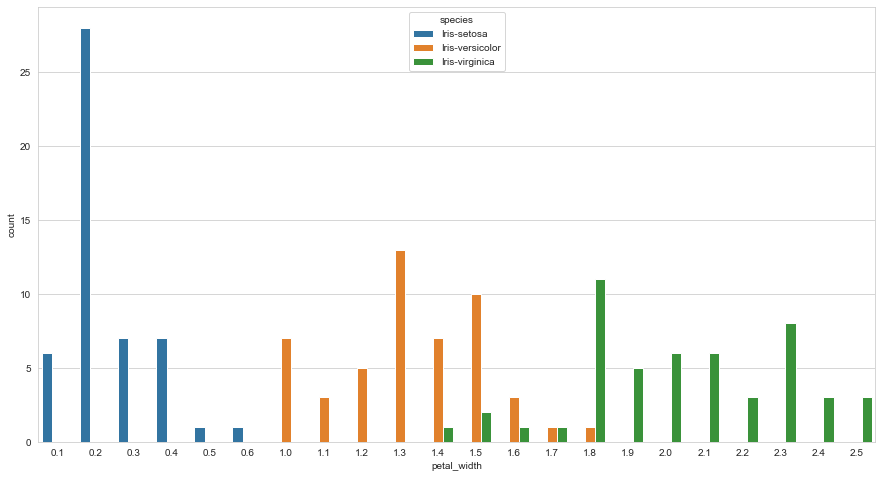

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(x='petal_width',data=df,hue='species')
plt.show()

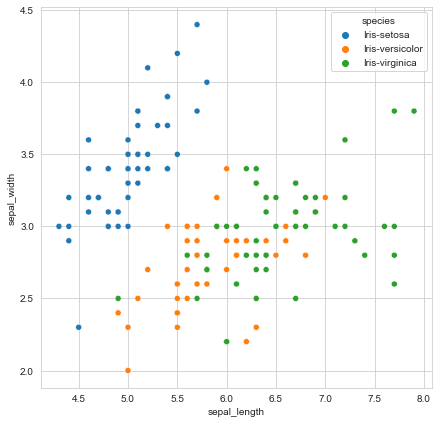

In [29]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species')
plt.show()

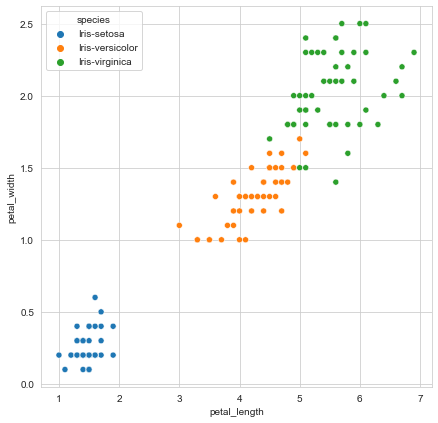

In [30]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="petal_length", y="petal_width", data=df, hue="species")
plt.show()

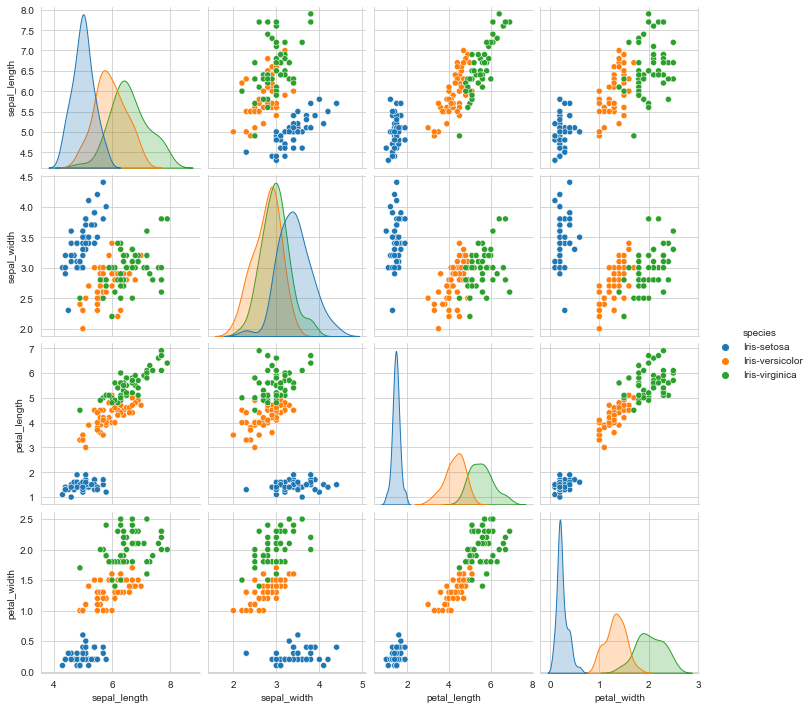

In [31]:
sns.set_style("whitegrid")
sns.pairplot(df,hue='species')
plt.show()

# Observation
* petal_length and petal_width are most useful feature to separate the various flower types
* While setosa can be easily separated(linearly separable),virnica and versicolor have some overlap(almost linearly separable)


# Model Selection

In [17]:
X=df.drop(['species'],axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y=df[['species']]
y.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [19]:
key= ['LogisticRegression','SVC','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','GaussianNB']
value=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),GaussianNB()]
models = dict(zip(key,value))
print(models)

{'LogisticRegression': LogisticRegression(), 'SVC': SVC(), 'DecisionTreeClassifier': DecisionTreeClassifier(), 'RandomForestClassifier': RandomForestClassifier(), 'KNeighborsClassifier': KNeighborsClassifier(), 'GaussianNB': GaussianNB()}


In [32]:
predicted=[]
for name,algo in models.items():
    model=algo
    scores=cross_val_score(model,X,y,cv=5)
    average_acc=np.average(scores)
    print(name,average_acc)
    predicted.append(average_acc)

LogisticRegression 0.9733333333333334
SVC 0.9666666666666666
DecisionTreeClassifier 0.9600000000000002
RandomForestClassifier 0.9666666666666668
KNeighborsClassifier 0.9733333333333334
GaussianNB 0.9533333333333334


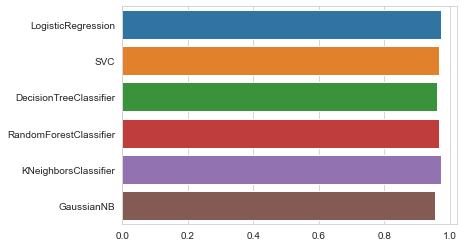

In [33]:
sns.barplot(x=predicted,y=key)
plt.show()

**Here, Logistic Regression and KNeighbors Classifier showing Highest accuracy**

In [34]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Model Building

**Logistic Regression**

In [35]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(f"Accuracy:{acc:.2f}")
print("Classification Report:\n",report)

Accuracy:1.00
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**KNeighbors Classifier**

In [36]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(f"Accuracy:{acc:.2f}")
print("Classification Report:\n",report)

Accuracy:1.00
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

